In [126]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

In [127]:
data = pd.read_csv("training.csv")
data

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,07/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,08/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,09/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,10/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,11/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,26/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,27/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,28/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,29/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


# Preprocessing 

In [128]:
# Removing the time from the PRODUCTION DATE column
data['PRODUCTION DATE'] = pd.to_datetime(data['PRODUCTION DATE']).dt.strftime('%d/%m/%Y')

# Renaming the columns to remove units
data.rename(columns=lambda x: x.split(' (')[0], inplace=True)
data.head(4)

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure,Downhole Temperature,Average Tubing Pressure,Annulus Pressure,AVG WHP,Choke Size,Oil Production,Gas Volume,Water Production
0,04/07/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.0,273.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,04/08/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.0,273.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,04/09/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.0,273.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,04/10/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.0,273.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
data.describe(include='all')

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure,Downhole Temperature,Average Tubing Pressure,Annulus Pressure,AVG WHP,Choke Size,Oil Production,Gas Volume,Water Production
count,6925,6925,6925,6925.000000,6925,6925,6925,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6919.000000,6925.000000,6.925000e+03,6925.000000
unique,2611,1,5,NaN,5,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,04/07/2014,DSEAT,DSEAT-001-F-12 H,NaN,001-F-12,production,OP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,6925,2611,NaN,2611,6925,6924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,107.297040,NaN,NaN,NaN,2587.482923,349.674794,2161.986343,180.369383,716.576882,21.864557,8494.774524,6.978690e+06,11480.559310
std,NaN,NaN,NaN,0.980161,NaN,NaN,NaN,1588.474034,46.240823,1053.875029,139.771514,347.859953,22.300691,8927.596731,7.100875e+06,11484.481008
min,NaN,NaN,NaN,105.000000,NaN,NaN,NaN,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600
25%,NaN,NaN,NaN,107.000000,NaN,NaN,NaN,0.000000,273.150000,896.612291,0.000000,476.539814,4.631982,1686.600600,1.434288e+06,80.323300
50%,NaN,NaN,NaN,107.000000,NaN,NaN,NaN,3378.397358,376.911370,2472.031527,213.091127,619.647824,14.301660,5479.470600,4.770461e+06,5529.413200
75%,NaN,NaN,NaN,108.000000,NaN,NaN,NaN,3664.905359,379.496193,2907.047474,300.356843,903.890487,31.529768,11730.472600,9.892230e+06,22261.505100


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PRODUCTION DATE          6925 non-null   object 
 1   Field Name               6925 non-null   object 
 2   WELL_BORE_CODE           6925 non-null   object 
 3   N_WELL_BORE_CODE         6925 non-null   int64  
 4   WellBore Name            6925 non-null   object 
 5   FLOW_KIND                6925 non-null   object 
 6   WELL_TYPE                6925 non-null   object 
 7   Downhole Pressure        6925 non-null   float64
 8   Downhole Temperature     6925 non-null   float64
 9   Average Tubing Pressure  6925 non-null   float64
 10  Annulus Pressure         6925 non-null   float64
 11  AVG WHP                  6925 non-null   float64
 12  Choke Size               6919 non-null   float64
 13  Oil Production           6925 non-null   float64
 14  Gas Volume              

In [131]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

PRODUCTION DATE
False    6925
Name: PRODUCTION DATE, dtype: int64

Field Name
False    6925
Name: Field Name, dtype: int64

WELL_BORE_CODE
False    6925
Name: WELL_BORE_CODE, dtype: int64

N_WELL_BORE_CODE
False    6925
Name: N_WELL_BORE_CODE, dtype: int64

WellBore Name
False    6925
Name: WellBore Name, dtype: int64

FLOW_KIND
False    6925
Name: FLOW_KIND, dtype: int64

WELL_TYPE
False    6925
Name: WELL_TYPE, dtype: int64

Downhole Pressure
False    6925
Name: Downhole Pressure, dtype: int64

Downhole Temperature
False    6925
Name: Downhole Temperature, dtype: int64

Average Tubing Pressure
False    6925
Name: Average Tubing Pressure, dtype: int64

Annulus Pressure
False    6925
Name: Annulus Pressure, dtype: int64

AVG WHP
False    6925
Name: AVG WHP, dtype: int64

Choke Size
False    6919
True        6
Name: Choke Size, dtype: int64

Oil Production
False    6925
Name: Oil Production, dtype: int64

Gas Volume
False    6925
Name: Gas Volume, dtype: int64

Water Production
False   

In [132]:
def flow_kind(data):
    return data['FLOW_KIND'].eq('production').all()
result = flow_kind(data)
print(f"All 'FLOW_KIND' values are 'production': {result}")

All 'FLOW_KIND' values are 'production': True


In [133]:
def well_type(data):
    return data['WELL_TYPE'].eq('OP').all()
result = well_type(data)
print(f"All 'WELL_TYPE' values are 'OP': {result}")

All 'WELL_TYPE' values are 'OP': False


In [134]:
data = data.dropna()
data['WELL_TYPE'] = data['WELL_TYPE'].apply(lambda x: 1 if x == "OP" else 0)
data

C:\Users\Hakeem\AppData\Local\Temp\ipykernel_13364\474860435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WELL_TYPE'] = data['WELL_TYPE'].apply(lambda x: 1 if x == "OP" else 0)


,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure,Downhole Temperature,Average Tubing Pressure,Annulus Pressure,AVG WHP,Choke Size,Oil Production,Gas Volume,Water Production
0,04/07/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,1,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,04/08/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,1,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,04/09/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,1,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,04/10/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,1,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,04/11/2014,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,1,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,26/06/2015,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,1,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,27/06/2015,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,1,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,28/06/2015,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,1,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,29/06/2015,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,1,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


# Feature Engineering

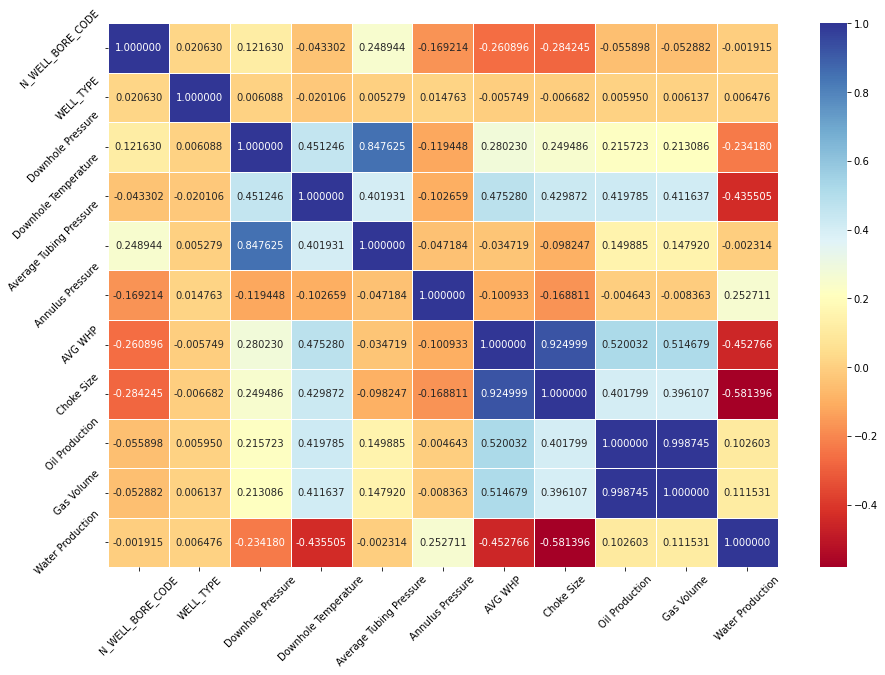

In [135]:
# USING SPEARMAN'S CORRELATIOM
cor = data.corr(method='spearman')
fig,ax = plt.subplots(figsize=(15,10))
corrmap = sns.heatmap(cor, fmt='3f', annot=True, cmap='RdYlBu', linewidths=0.5, ax=ax)
corrmap.tick_params(right=False, top=False, labelright=False, labeltop=False, rotation=45)


<Axes: >

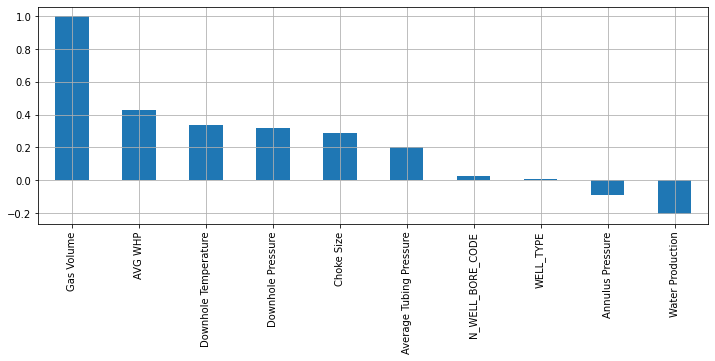

In [136]:
data.corr()['Oil Production'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,4), grid=True)

<Axes: >

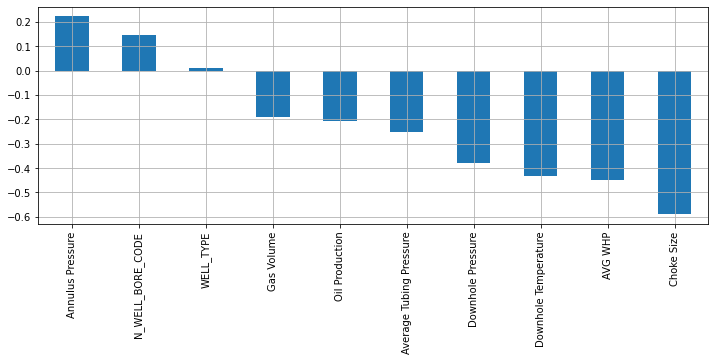

In [137]:
data.corr()['Water Production'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,4), grid=True)


<Axes: >

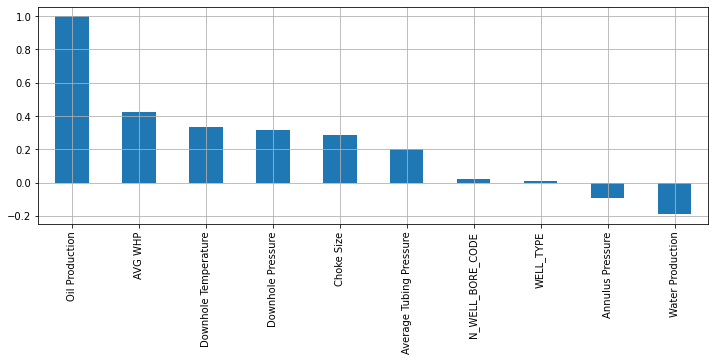

In [138]:
data.corr()['Gas Volume'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,4), grid=True)

In [139]:
corr_df = pd.DataFrame()
corr_df['Oil Correlation'] = data.corr()['Oil Production'].sort_values(ascending=False)[1:]
corr_df['Water Correlation'] = data.corr()['Water Production'].sort_values(ascending=False)[1:]
corr_df['Gas Correlation'] = data.corr()['Gas Volume'].sort_values(ascending=False)[1:]
corr_df

,Oil Correlation,Water Correlation,Gas Correlation
Gas Volume,0.998424,-0.190065,NaN
AVG WHP,0.427757,-0.450024,0.425872
Downhole Temperature,0.339250,-0.431863,0.336379
Downhole Pressure,0.317788,-0.380996,0.315732
Choke Size,0.288396,-0.589275,0.283179
Average Tubing Pressure,0.203253,-0.252557,0.202248
N_WELL_BORE_CODE,0.023713,0.146920,0.022773
WELL_TYPE,0.007024,0.011013,0.007169
Annulus Pressure,-0.092919,0.221559,-0.090154
Water Production,-0.206911,NaN,-0.190065


In [140]:
# picking features with high correlation
selected_columns = [
    'AVG WHP',
    'Downhole Temperature',
    'Downhole Pressure',
    'Choke Size',
    'Average Tubing Pressure',
    'Annulus Pressure',
    'Water Production',
    'Gas Volume',
    'Oil Production'
]
new_data = data[selected_columns]
new_data

,AVG WHP,Downhole Temperature,Downhole Pressure,Choke Size,Average Tubing Pressure,Annulus Pressure,Water Production,Gas Volume,Oil Production
0,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,479.919260,370.025890,4500.454030,33.071950,4020.534770,0.000000,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
6920,442.599145,379.373252,2903.229117,1.880480,2460.629972,182.554483,64.2838,614123.984,747.8181
6921,448.871358,379.379814,2905.030564,2.120109,2456.159205,184.106427,64.4725,614168.462,749.2019
6922,443.964042,379.313739,2928.389988,1.980460,2484.425946,175.609150,65.9192,648175.070,789.9611
6923,443.874486,379.288114,2939.874982,1.692930,2496.000496,173.255362,63.3403,637067.219,789.7724


# Exploratory Data Analysis

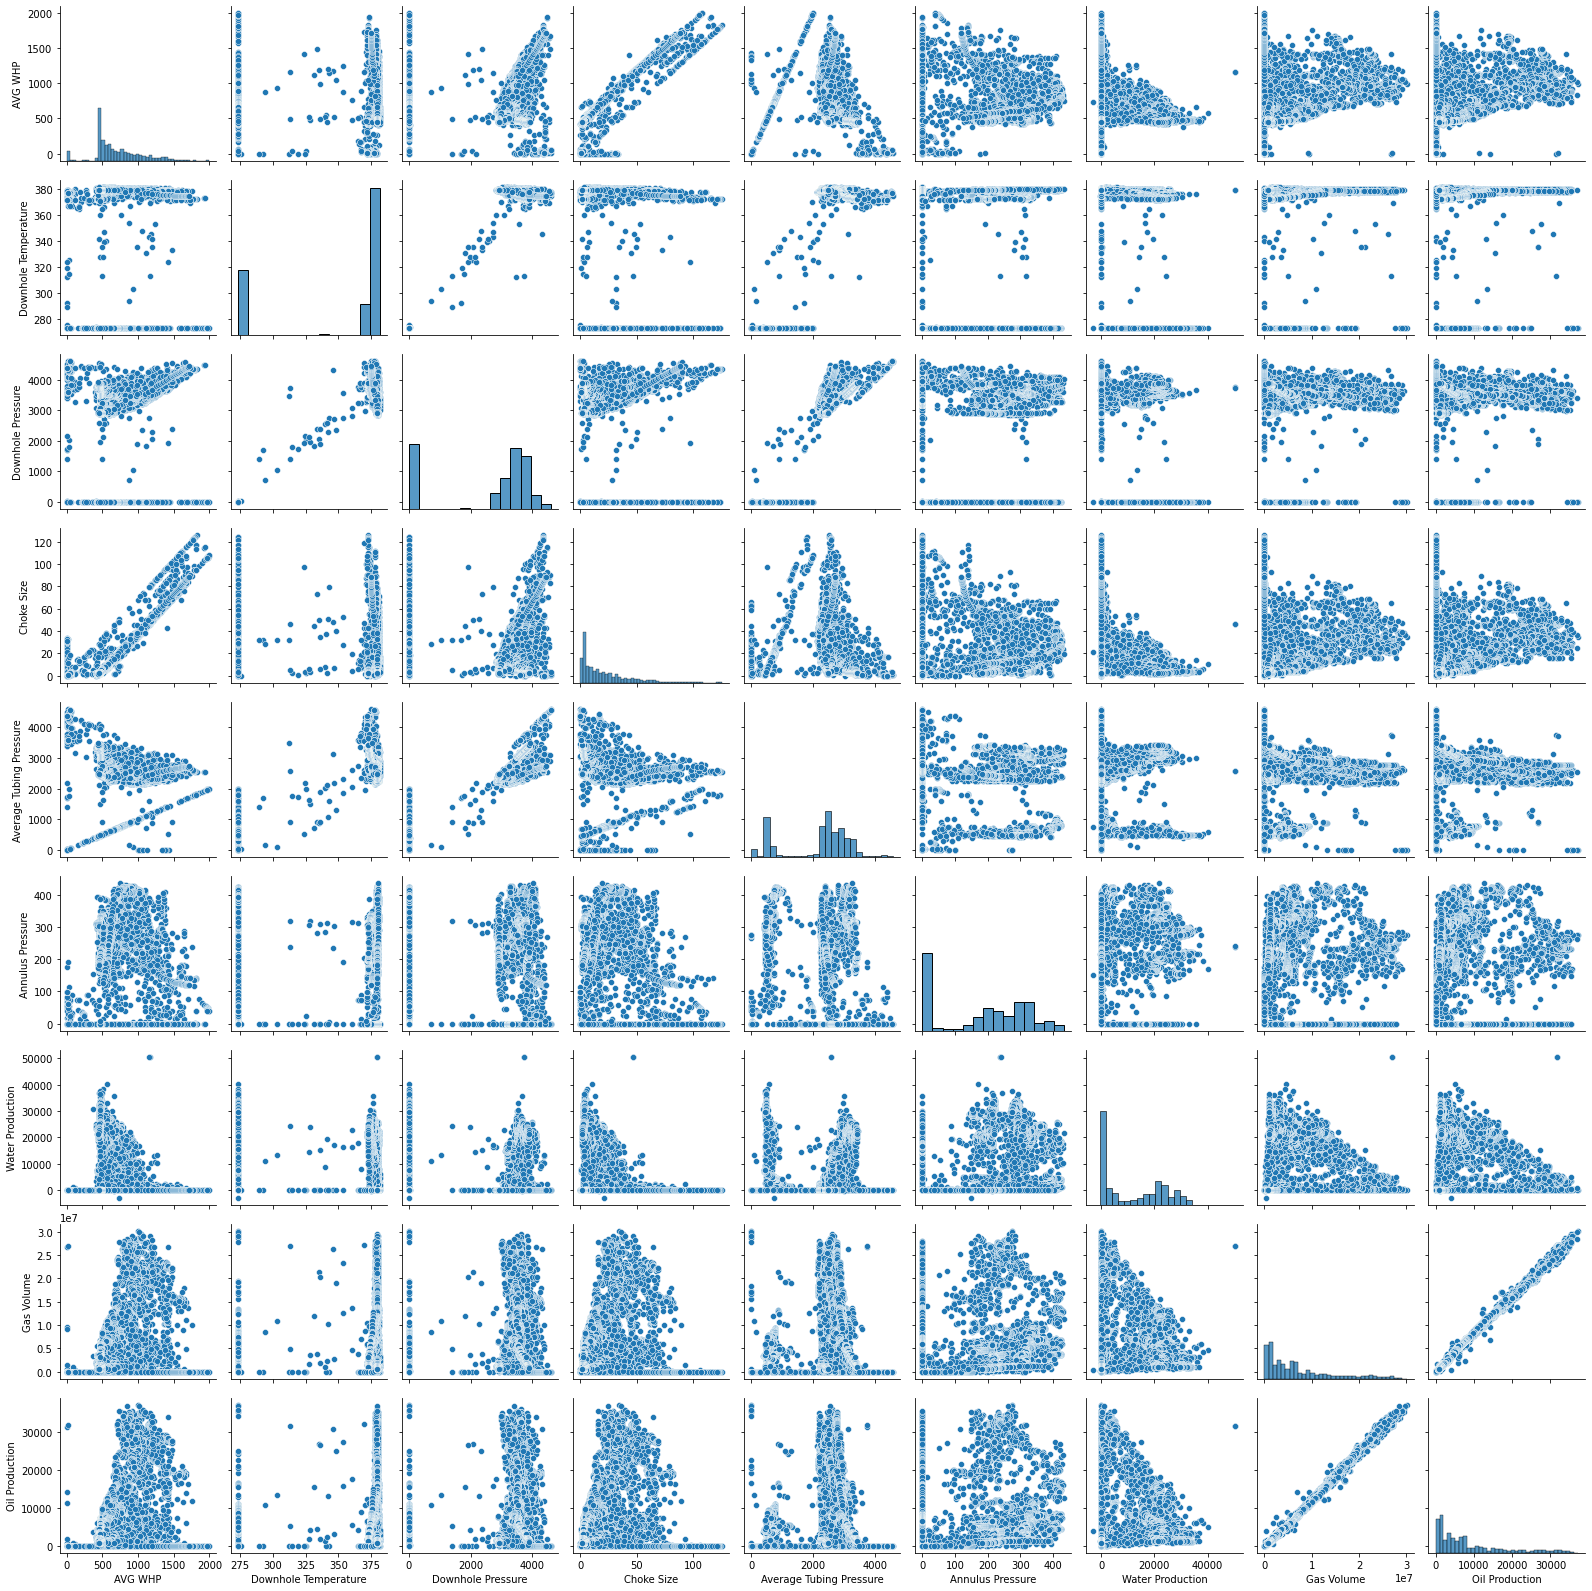

In [141]:
sns.pairplot(new_data)

# Train-Test Split. 

In [142]:
# Dropping the last 3 columns (features)
X = new_data.iloc[:, :-3]
# Dropping the first 6 columns (targets)
Y = new_data.iloc[:, 6:]

In [143]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Using Different Regression Models To Make Predictions

In [144]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### Random Forest 

In [145]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(random_state=0)
model.fit(X,Y)

# EVALUATING THE MODEL
yrand = model.predict(X_test)

In [146]:
# EVALUATING MODEL PREDICTIONS
rand_score_train = model.score(X_train,Y_train)
rand_score_test = model.score(X_test,Y_test)
rand_mean = mean_absolute_error(Y_test, yrand)
rand_mean_square_error = mean_squared_error(Y_test, yrand)
rand_rmse = np.sqrt(mean_squared_error(Y_test, yrand))
rand_mape = mean_absolute_percentage_error(Y_test, yrand)

print('Accuracy of trained data:', rand_score_train)
print('Accuracy of test data:', rand_score_test)
print('mean absolute error:', rand_mean)
print('root mean squared error:', rand_rmse)
print('mean absolute percentage error:', rand_mape)

Accuracy of trained data: 0.9910165259795519
Accuracy of test data: 0.9934890226162474
mean absolute error: 80310.87203815472
root mean squared error: 335996.27081813925
mean absolute percentage error: 1.927264455891562e+19


In [147]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
randR = OLS(Y_test, add_constant(yrand)).fit()
print('AIC', randR.aic)

AIC 40613.721645510246


### Ridge Regression

In [148]:
from sklearn.linear_model import Ridge

# RIGDE REGRESSION
ridge = Ridge()
ridge.fit(X_train, Y_train)

# EVALUATING THE MODEL
yridge = ridge.predict(X_test)

In [149]:
# EVALUATING MODEL PREDICTIONS
ridge_score_train = ridge.score(X_train,Y_train)
ridge_score_test = ridge.score(X_test,Y_test)
ridge_mean = mean_absolute_error(Y_test, yridge)
ridge_mean_square_error = mean_squared_error(Y_test, yridge)
ridge_rmse = np.sqrt(mean_squared_error(Y_test, yridge))
ridge_mape = mean_absolute_percentage_error(Y_test, yridge)

print('Accuracy of trained data:', ridge_score_train)
print('Accuracy of test data:', ridge_score_test)
print('mean absolute error:', ridge_mean)
print('root mean squared error:', ridge_rmse)
print('mean absolute percentage error:', ridge_mape)


Accuracy of trained data: 0.43508697701812676
Accuracy of test data: 0.46827709646818677
mean absolute error: 1413798.7342949884
root mean squared error: 3285911.241988513
mean absolute percentage error: 7.821825402553905e+20


In [150]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
ridger = OLS(Y_test, add_constant(yridge)).fit()
print('AIC', ridger.aic)

AIC 46976.97097636223


### Bagging Regression

In [151]:
from sklearn.ensemble import BaggingRegressor

Bag = BaggingRegressor()
Bag.fit(X_train,Y_train)

# EVALUATING THE MODEL
yBag = Bag.predict(X_test)

In [152]:
# EVALUATING MODEL PREDICTIONS
Bag_score_train = Bag.score(X_train,Y_train)
Bag_score_test = Bag.score(X_test,Y_test)
Bag_mean = metrics.mean_absolute_error(Y_test, yBag)
Bag_mean_square_error = metrics.mean_squared_error(Y_test, yBag)
Bag_rmse = np.sqrt(metrics.mean_squared_error(Y_test, yBag))
Bag_mape = metrics.mean_absolute_percentage_error(Y_test, yBag)

print('Accuracy of trained data:', Bag_score_train)
print('Accuracy of test data:', Bag_score_test)
print('mean absolute error:', Bag_mean)
print('root mean squared error:', Bag_rmse)
print('mean absolute percentage error:', Bag_mape)

Accuracy of trained data: 0.986194022654527
Accuracy of test data: 0.9415778028610958
mean absolute error: 249183.92168859206
root mean squared error: 1025122.2761021416
mean absolute percentage error: 5.466447285755734e+19


In [153]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
BagR = OLS(Y_test, add_constant(yBag)).fit()
print('AIC', BagR.aic)

AIC 43759.6104804325


### Extra Tree Regression

In [154]:
from sklearn.ensemble import ExtraTreesRegressor 

extra = ExtraTreesRegressor()
extra.fit(X_train,Y_train)

# EVALUATING THE MODEL
yextra = extra.predict(X_test)

In [155]:
# EVALUATING MODEL PREDICTIONS
extra_score_train = extra.score(X_train,Y_train)
extra_score_test = extra.score(X_test,Y_test)
extra_mean = metrics.mean_absolute_error(Y_test, yextra)
extra_mean_square_error = metrics.mean_squared_error(Y_test, yextra)
extra_rmse = np.sqrt(metrics.mean_squared_error(Y_test, yextra))
extra_mape = metrics.mean_absolute_percentage_error(Y_test, yextra)

print('Accuracy of trained data:', extra_score_train)
print('Accuracy of test data:', extra_score_test)
print('mean absolute error:', extra_mean)
print('root mean squared error:', extra_rmse)
print('mean absolute percentage error:', extra_mape)

Accuracy of trained data: 0.9999977135482357
Accuracy of test data: 0.9542418120885361
mean absolute error: 211669.58136280326
root mean squared error: 875929.8156933738
mean absolute percentage error: 6.940945431871174e+19


In [156]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
extraR = OLS(Y_test, add_constant(yextra)).fit()
print('AIC', extraR.aic)

AIC 43317.237548328


### XGB Regression

In [157]:
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

# EVALUATING THE MODEL
yxgb = xgb.predict(X_test)

In [158]:
# EVALUATING MODEL PREDICTIONS
xgb_score_train = xgb.score(X_train,Y_train)
xgb_score_test = xgb.score(X_test,Y_test)
xgb_mean = metrics.mean_absolute_error(Y_test, yxgb)
xgb_mean_square_error = metrics.mean_squared_error(Y_test, yxgb)
xgb_rmse = np.sqrt(metrics.mean_squared_error(Y_test, yxgb))
xgb_mape = metrics.mean_absolute_percentage_error(Y_test, yxgb)

print('Accuracy of trained data:', xgb_score_train)
print('Accuracy of test data:', xgb_score_test)
print('mean absolute error:', xgb_mean)
print('root mean squared error:', xgb_rmse)
print('mean absolute percentage error:', xgb_mape)

Accuracy of trained data: 0.9940374253004651
Accuracy of test data: 0.9414953814789043
mean absolute error: 297051.02830580925
root mean squared error: 1036710.0788807586
mean absolute percentage error: 6.418820808489465e+19


In [159]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
xgbR = OLS(Y_test, add_constant(yxgb)).fit()
print('AIC', xgbR.aic)

AIC 43643.95748055262


### Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train,Y_train)

# EVALUATING THE MODEL
ylin = lin.predict(X_test)

In [161]:
lin_score_train = lin.score(X_train,Y_train)
lin_score_test = lin.score(X_test,Y_test)
lin_mean = metrics.mean_absolute_error(Y_test, ylin)
lin_mean_square_error = metrics.mean_squared_error(Y_test, ylin)
lin_rmse = np.sqrt(metrics.mean_squared_error(Y_test, ylin))
lin_mape = metrics.mean_absolute_percentage_error(Y_test, ylin)

print('Accuracy of trained data:', lin_score_train)
print('Accuracy of test data:', lin_score_test)
print('mean absolute error:', lin_mean)
print('root mean squared error:', lin_rmse)
print('mean absolute percentage error:', lin_mape)

Accuracy of trained data: 0.4350869770197656
Accuracy of test data: 0.4682770452771224
mean absolute error: 1413798.8397495486
root mean squared error: 3285911.368208879
mean absolute percentage error: 7.821832890561243e+20


In [162]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
linR = OLS(Y_test, add_constant(ylin)).fit()
print('AIC', linR.aic)

AIC 46976.97102784551


## Making A Dataframe For The Models

In [163]:
summary = pd.DataFrame()
summary['Models'] = ['RandomForest','Ridge Regression', 'Extra Tree Regression', 'XGBoost Regression', 'Bagging Regression', 'Linear Regression']
summary['Train_Score'] = rand_score_train, ridge_score_train, extra_score_train, xgb_score_train, Bag_score_train, lin_score_train
summary['Test_Score'] = rand_score_test, ridge_score_test, extra_score_test, xgb_score_test, Bag_score_test, lin_score_test
summary['AIC'] = randR.aic, ridger.aic, extraR.aic, xgbR.aic, BagR.aic, linR.aic
summary['Mean_Absolute_Error'] = rand_mean, ridge_mean, extra_mean, xgb_mean, Bag_mean, lin_mean
summary['Root_Mean_Squared_Error'] = rand_rmse, ridge_rmse, extra_rmse, xgb_rmse, Bag_rmse, lin_rmse
summary['Mean_Absolute_Percentage_Error'] = rand_mape, ridge_mape, extra_mape, xgb_mape, Bag_mape, lin_mape
summary

,Models,Train_Score,Test_Score,AIC,Mean_Absolute_Error,Root_Mean_Squared_Error,Mean_Absolute_Percentage_Error
0,RandomForest,0.991017,0.993489,40613.721646,8.031087e+04,3.359963e+05,1.927264e+19
1,Ridge Regression,0.435087,0.468277,46976.970976,1.413799e+06,3.285911e+06,7.821825e+20
2,Extra Tree Regression,0.999998,0.954242,43317.237548,2.116696e+05,8.759298e+05,6.940945e+19
3,XGBoost Regression,0.994037,0.941495,43643.957481,2.970510e+05,1.036710e+06,6.418821e+19
4,Bagging Regression,0.986194,0.941578,43759.610480,2.491839e+05,1.025122e+06,5.466447e+19
5,Linear Regression,0.435087,0.468277,46976.971028,1.413799e+06,3.285911e+06,7.821833e+20


# Hyper Parameter Tuning

In [184]:
# HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(model,param_grid,cv=5)
grid_search.fit(X_train,Y_train)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate and print performance metrics
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters=",best_params)
print("Best score=",best_score)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


c:\Users\Hakeem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Hakeem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Hakeem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

Best parameters= {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score= 0.9301963854868178
Mean Absolute Error: 240465.8548707955
Root Mean Squared Error: 909927.5460617737
R^2 Score: 0.9531615813568802


In [186]:
print("Training Score: ", best_rf.score(X_train, Y_train))
print("Test Score: ", best_rf.score(X_test, Y_test))


Training Score:  0.9899802169775791
Test Score:  0.9531615813568802


### Can't use tuned model because it has a less test score

# Selecting The Best Model

In [166]:
# EVALUATING THE RANDOM FOREST MODEL - BEST MODEL
yrand = model.predict(X_test)
yrand

array([[0.00000000e+00, 1.19780806e+06, 1.47143480e+03],
       [9.35863688e+03, 2.03207819e+07, 2.56242272e+04],
       [1.99563899e+03, 1.16334938e+07, 1.46472066e+04],
       ...,
       [2.81627391e+03, 4.51562406e+06, 5.22153154e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.91838514e+04, 1.51038756e+06, 1.75677687e+03]])

In [167]:
test = pd.DataFrame()
test[['Water Production', 'Gas Volume', 'Oil Production']]  = Y_test
test[['Predicted Water Production', 'Predicted Gas Volume', 'Predicted Oil Production']] = yrand
test

,Water Production,Gas Volume,Oil Production,Predicted Water Production,Predicted Gas Volume,Predicted Oil Production
6546,0.0000,1.206262e+06,1458.7139,0.000000,1.197808e+06,1471.434796
1891,9489.1569,2.072389e+07,26042.8015,9358.636884,2.032078e+07,25624.227160
4307,2109.1628,1.167863e+07,14682.8728,1995.638993,1.163349e+07,14647.206613
5077,28593.2078,9.981626e+06,11343.7005,28512.545469,9.962821e+06,11318.458101
5723,21040.4903,4.279152e+06,4413.3785,20662.017226,4.097085e+06,4485.869492
...,...,...,...,...,...,...
4134,276.2568,1.158621e+07,14258.7381,320.815789,1.350386e+07,16691.266026
2148,21955.9369,8.569854e+06,10088.2165,21945.507451,8.593760e+06,10110.644124
1029,2949.7584,4.698174e+06,5445.5675,2816.273907,4.515624e+06,5221.531538
3892,0.0000,0.000000e+00,0.0000,0.000000,0.000000e+00,0.000000


# Visualise Predictions

Text(0.5, 1.0, 'Actual vs Prediction')

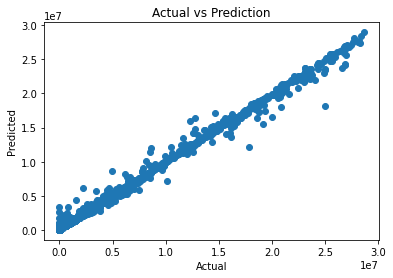

In [168]:
plt.scatter(Y_test,yrand)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Prediction")

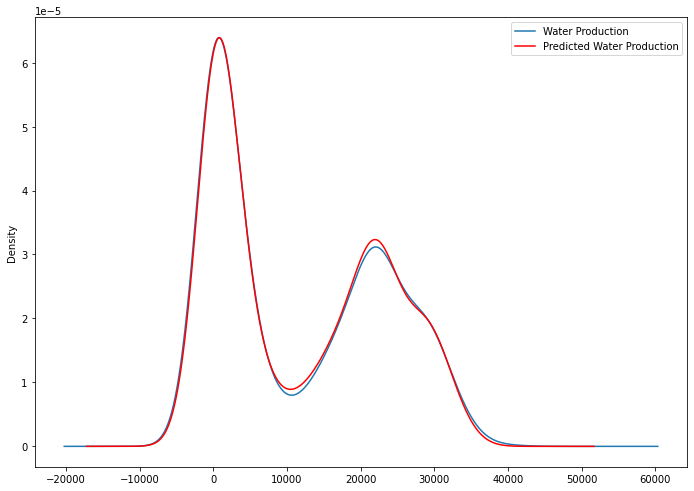

In [169]:
fig = plt.figure()
fig.set_size_inches(11.7, 8.27)
ax = fig.add_subplot(111)
test['Water Production'].plot(kind='kde', ax=ax)
test['Predicted Water Production'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

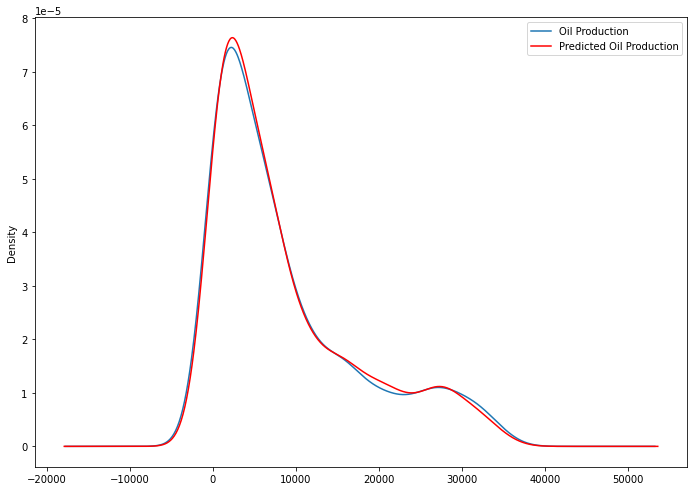

In [170]:
fig = plt.figure()
fig.set_size_inches(11.7, 8.27)
ax = fig.add_subplot(111)
test['Oil Production'].plot(kind='kde', ax=ax)
test['Predicted Oil Production'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

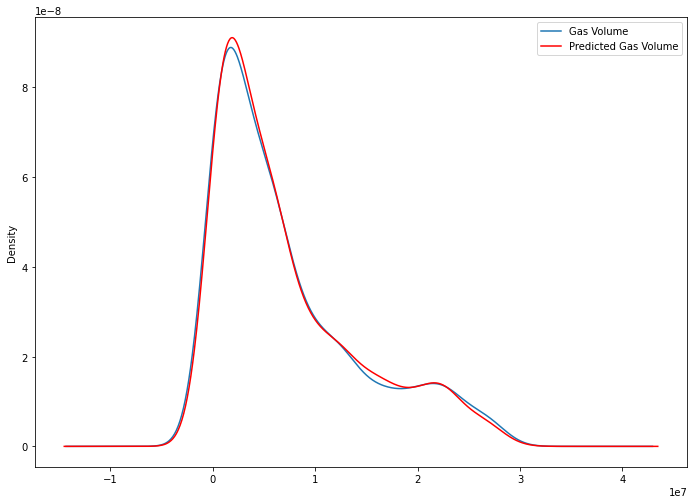

In [171]:
fig = plt.figure()
fig.set_size_inches(11.7, 8.27)
ax = fig.add_subplot(111)
test['Gas Volume'].plot(kind='kde', ax=ax)
test['Predicted Gas Volume'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

C:\Users\Hakeem\AppData\Local\Temp\ipykernel_13364\835694533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['Water Production'], hist=False, color='r', label='Actual Water Production', ax=axs[0])
C:\Users\Hakeem\AppData\Local\Temp\ipykernel_13364\835694533.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

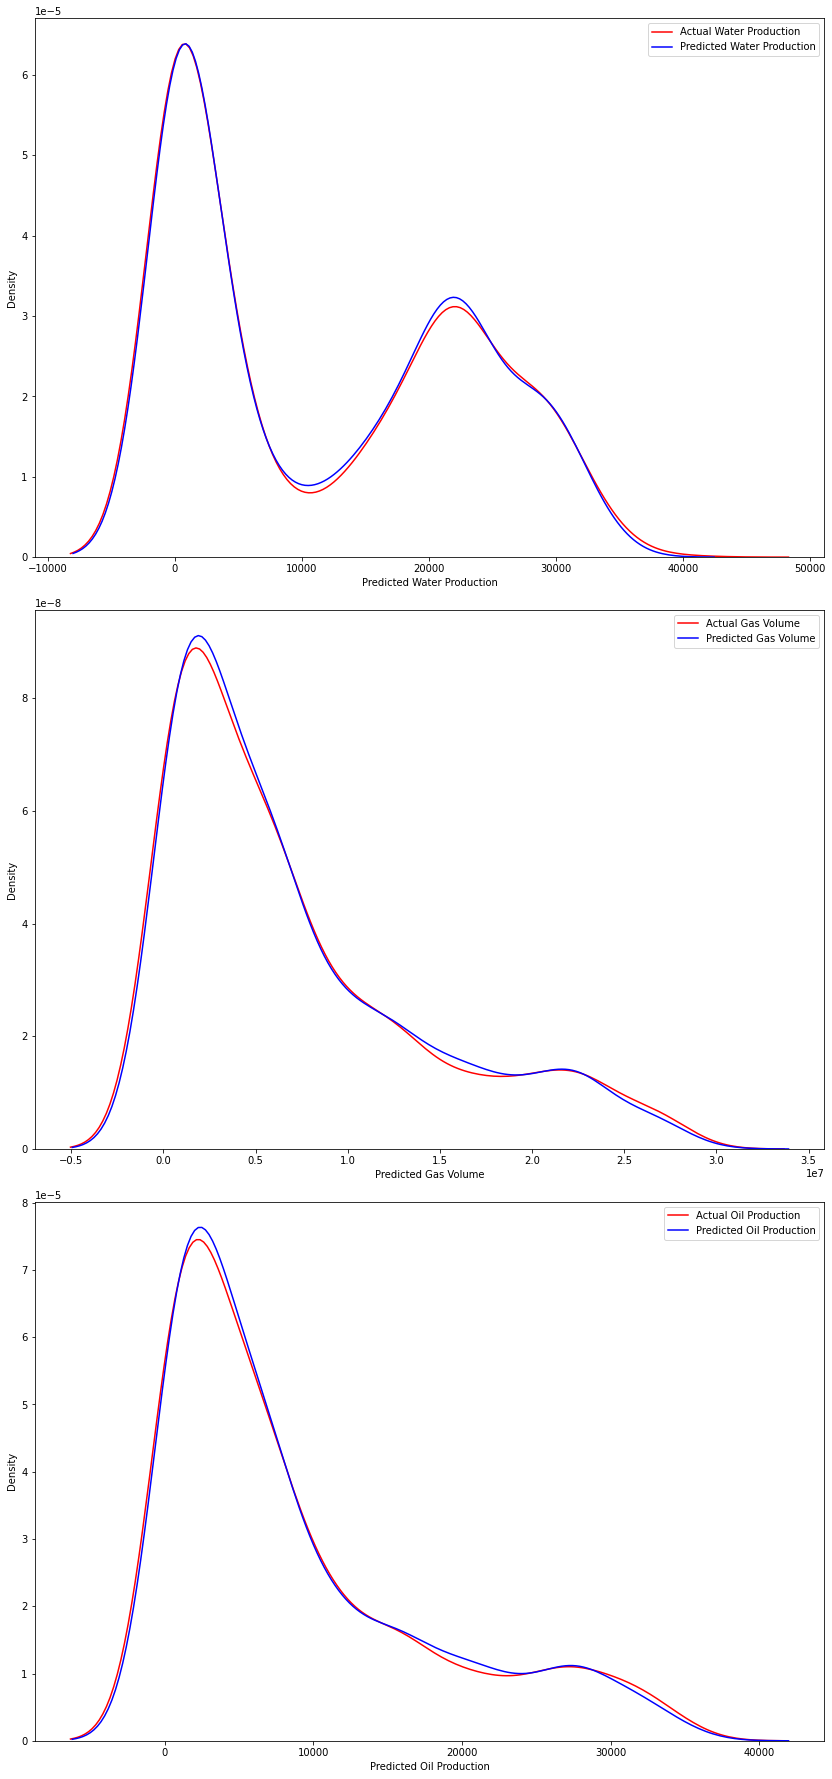

In [172]:
fig, axs = plt.subplots(3, 1, figsize=(11.7, 8.27 * 3))

sns.distplot(test['Water Production'], hist=False, color='r', label='Actual Water Production', ax=axs[0])
sns.distplot(test['Predicted Water Production'], hist=False, color='b', label='Predicted Water Production', ax=axs[0])
axs[0].set_ylabel('Density')
axs[0].legend()

sns.distplot(test['Gas Volume'], hist=False, color='r', label='Actual Gas Volume', ax=axs[1])
sns.distplot(test['Predicted Gas Volume'], hist=False, color='b', label='Predicted Gas Volume', ax=axs[1])
axs[1].set_ylabel('Density')
axs[1].legend()

sns.distplot(test['Oil Production'], hist=False, color='r', label='Actual Oil Production', ax=axs[2])
sns.distplot(test['Predicted Oil Production'], hist=False, color='b', label='Predicted Oil Production', ax=axs[2])
axs[2].set_ylabel('Density')
axs[2].legend()

plt.tight_layout()
plt.show()

# Testing The Model With The Validation Dataset

In [173]:
val = pd.read_csv('validation.csv')
val

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05 00:00:00,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Validation Dataset Preprocessing

In [174]:
val.rename(columns=lambda x: x.split(' (')[0], inplace=True)

In [175]:
# Dropping the first 13 columns
Y_val = val.iloc[:, 13:]
# Y_val = Y_val.dropna()
Y_val

,Oil Production,Gas Volume,Water Production
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
9915,NaN,NaN,NaN
9916,NaN,NaN,NaN
9917,NaN,NaN,NaN
9918,NaN,NaN,NaN


In [176]:
selected_columns = [
    'AVG WHP',
    'Downhole Temperature',
    'Downhole Pressure',
    'Choke Size',
    'Average Tubing Pressure',
    'Annulus Pressure'
]
new_val = val[selected_columns]
new_val

,AVG WHP,Downhole Temperature,Downhole Pressure,Choke Size,Average Tubing Pressure,Annulus Pressure
0,401.443468,380.665745,3061.253047,0.491632,2659.809580,0.0
1,700.497465,376.759980,3247.951135,21.775180,2547.453670,0.0
2,799.100220,375.985300,3333.012485,27.638780,2533.912265,0.0
3,922.217980,375.419010,3404.022465,36.178940,2481.804485,0.0
4,1057.162085,375.004710,3465.473030,45.424140,2408.310945,0.0
...,...,...,...,...,...,...
9915,NaN,NaN,NaN,NaN,NaN,NaN
9916,NaN,NaN,NaN,NaN,NaN,NaN
9917,NaN,NaN,NaN,NaN,NaN,NaN
9918,NaN,NaN,NaN,NaN,NaN,NaN


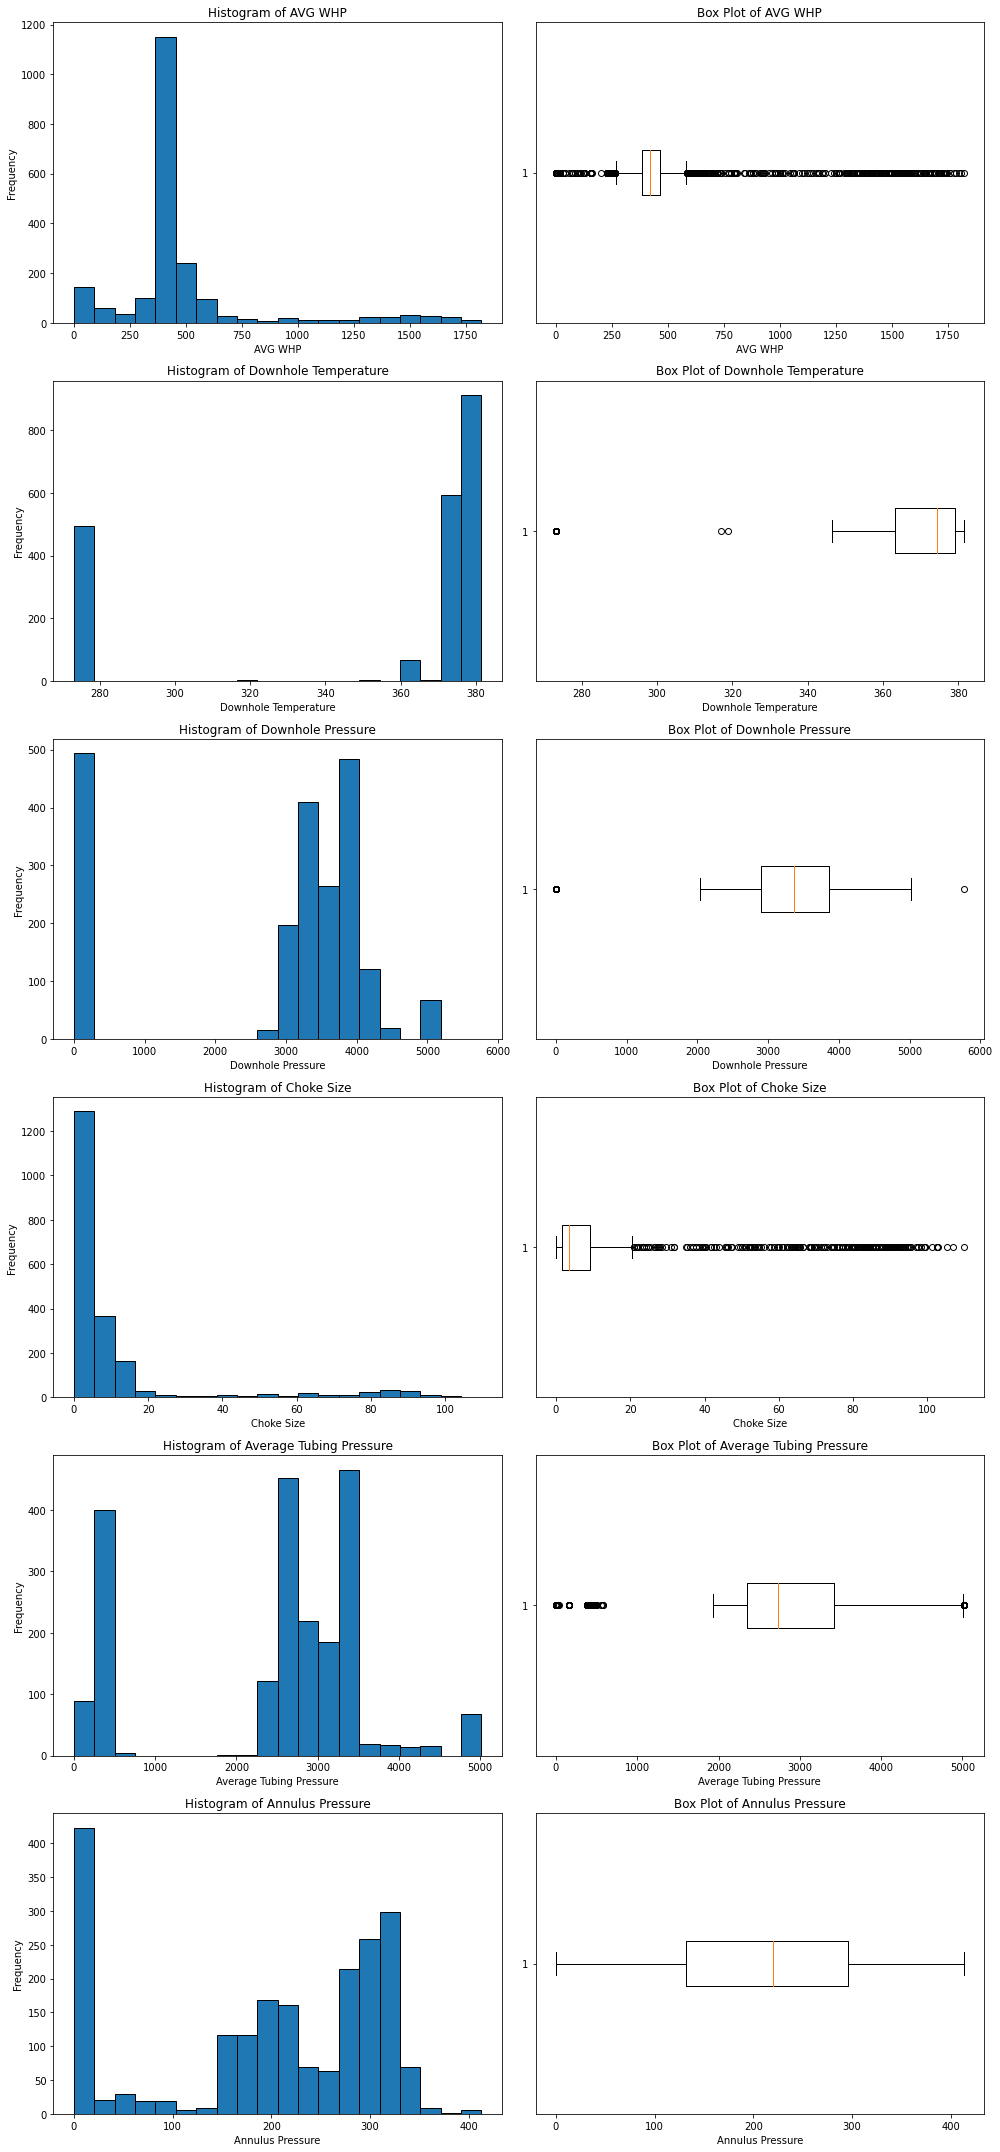

In [177]:
# function to plot histograms and box plots
def plot_distributions(new_val):
    num_columns = len(new_val.columns)
    fig, axes = plt.subplots(num_columns, 2, figsize=(14, num_columns * 5))

    for i, column in enumerate(new_val.columns):
        # Histogram
        axes[i, 0].hist(new_val[column].dropna(), bins=20, edgecolor='black')
        axes[i, 0].set_title(f'Histogram of {column}')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Frequency')

        # Box plot
        axes[i, 1].boxplot(new_val[column].dropna(), vert=False)
        axes[i, 1].set_title(f'Box Plot of {column}')
        axes[i, 1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot the distributions
plot_distributions(new_val)

In [178]:
# Using median because of outliers
new_val = new_val.fillna(new_val.mean())
new_val

,AVG WHP,Downhole Temperature,Downhole Pressure,Choke Size,Average Tubing Pressure,Annulus Pressure
0,401.443468,380.665745,3061.253047,0.491632,2659.809580,0.000000
1,700.497465,376.759980,3247.951135,21.775180,2547.453670,0.000000
2,799.100220,375.985300,3333.012485,27.638780,2533.912265,0.000000
3,922.217980,375.419010,3404.022465,36.178940,2481.804485,0.000000
4,1057.162085,375.004710,3465.473030,45.424140,2408.310945,0.000000
...,...,...,...,...,...,...
9915,487.723448,351.655653,2770.769569,11.566877,2447.863733,197.054017
9916,487.723448,351.655653,2770.769569,11.566877,2447.863733,197.054017
9917,487.723448,351.655653,2770.769569,11.566877,2447.863733,197.054017
9918,487.723448,351.655653,2770.769569,11.566877,2447.863733,197.054017


In [179]:
# EVALUATING THE RANDOM FOREST MODEL (BEST MODEL) ON THE VALIDATION DATASET
yrand = model.predict(new_val)

val_test = pd.DataFrame()
val_test[['Water Production (stb/day)', 'Gas Volume (scf/day)', 'Oil Production (stb/day)']] = yrand
val_test = val_test.applymap(lambda x: '{:.5f}'.format(x))
val_test

,Water Production (stb/day),Gas Volume (scf/day),Oil Production (stb/day)
0,921.55859,485368.03884,560.43837
1,2890.01472,1647767.29143,2023.51564
2,360.64784,355030.06765,432.40542
3,113.23384,48690.13367,53.33291
4,0.00000,0.00000,0.00000
...,...,...,...
9915,5117.84403,1073603.19699,1244.39662
9916,5117.84403,1073603.19699,1244.39662
9917,5117.84403,1073603.19699,1244.39662
9918,5117.84403,1073603.19699,1244.39662


# Total Production Data

In [180]:
val_test_float = val_test.astype(float)
sum_row = val_test_float.sum()
sum_row.name = 'TOTALS'

val_test = val_test.append(sum_row)
val_test = val_test.applymap(lambda x: '{:.5f}'.format(x) if isinstance(x, (float, int)) else x)

val_test


C:\Users\Hakeem\AppData\Local\Temp\ipykernel_13364\1430819859.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val_test = val_test.append(sum_row)


,Water Production (stb/day),Gas Volume (scf/day),Oil Production (stb/day)
0,921.55859,485368.03884,560.43837
1,2890.01472,1647767.29143,2023.51564
2,360.64784,355030.06765,432.40542
3,113.23384,48690.13367,53.33291
4,0.00000,0.00000,0.00000
...,...,...,...
9916,5117.84403,1073603.19699,1244.39662
9917,5117.84403,1073603.19699,1244.39662
9918,5117.84403,1073603.19699,1244.39662
9919,5117.84403,1073603.19699,1244.39662


# Saving The Predicted Production Dataset

In [182]:
val_test.to_csv('Hakeem_Salifu_2024_DSEATS_Datathon_5554170.csv', index=False)

# Saving The Model For Future Deployment

In [183]:
import pickle 

# saving the model
with open ("ProdModel.pkl", 'wb') as file:
    pickle.dump(extra, file)